In [77]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image as pimg

**caminhos das imagens que vão ser lidas**

- Definimos as matrizes como linha e coluna e vendo o shpe das imagens que inicialmente são coloridas e no processa vamos torna-lás em tons de cinza.

In [78]:
img1 = cv.imread("/content/drive/MyDrive/Atividade_2_Processamento_de_imagens/elsa.png", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("/content/drive/MyDrive/Atividade_2_Processamento_de_imagens/cachorro.jpeg", cv.IMREAD_GRAYSCALE)

linha_1, coluna_1 = img1.shape[:2]
linha_2, coluna_2 = img2.shape[:2]

**Função de distribuição cumulativa**
- que é  uma maneira comum de equalizar o histograma de uma imagem.Utilizando a soma de acordo com os valores de pixels.

In [79]:
def fun_distr_cum(hist):  
    fun_distr_cum = np.zeros((256))
    fun_distr_cum[0] = hist[0]
    for i in range(1, len(hist)):
        fun_distr_cum[i]= fun_distr_cum[i-1]+hist[i]
        
    fun_distr_cum = [ele*255/fun_distr_cum[-1] for ele in fun_distr_cum]     
    return fun_distr_cum

**Equalizando imagens**

- usada para aumentar o contraste da imagem e reduzir o ruido das imagens.

In [80]:
def equali_imagem(image):
    equa = fun_distr_cum(df(image))
    imagem_equalizada = np.zeros_like(image)
    #imagem_equalizada = np.interp(x=image, xp=range(0,256), fp=equa)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            pixel_val = image[x, y]
            imagem_equalizada[x, y] = equa[pixel_val]
            
    return imagem_equalizada

In [81]:
def valores_img_prox(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

-**Gráficos e imagens dos processos de equalização de histograma, histograma ,match de histograma**

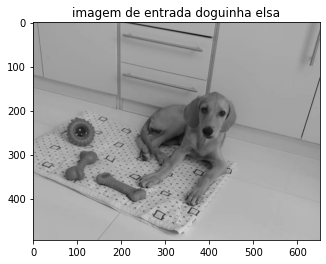

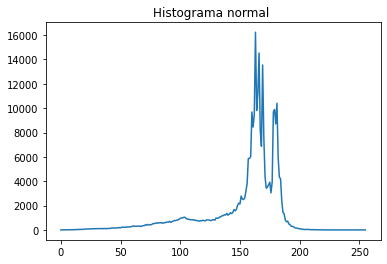

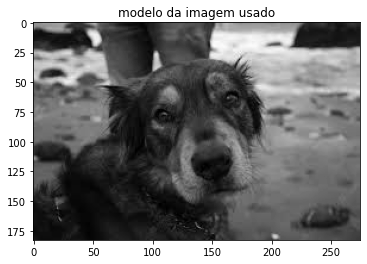

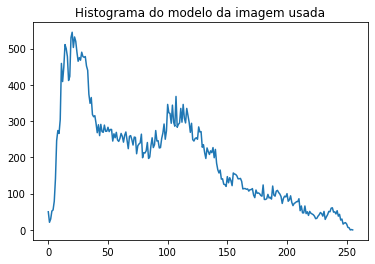

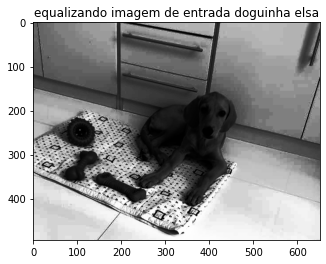

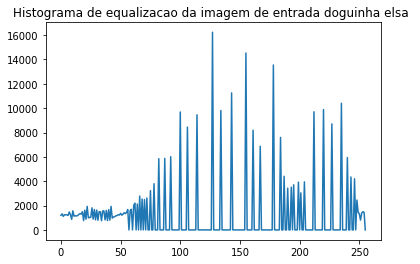

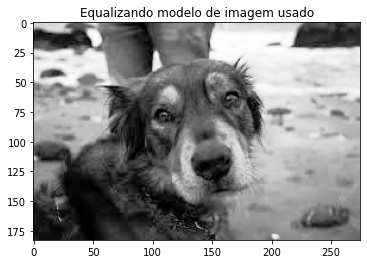

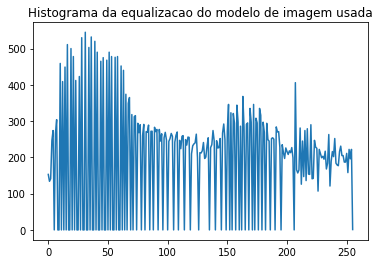

TypeError: ignored

In [82]:

    
    
plt.figure(0)
plt.title('imagem de entrada doguinha elsa')
plt.imshow(img1, cmap=cm.gray, vmin=0, vmax=256)
plt.figure(1)
plt.title('Histograma normal ')
plt.plot(df(img1))
plt.figure(2)
plt.title('modelo da imagem usado')
plt.imshow(img2, cmap=cm.gray, vmin=0, vmax=256)
plt.figure(3)
plt.title('Histograma do modelo da imagem usada')
plt.plot(df(img2))
plt.show()

eq1 = equali_imagem(img1)
eqHist1 = fun_distr_cum(df(eq1))
hist1 = df(eq1)
eq2 = equali_imagem(img2)
eqHist2 = fun_distr_cum(df(eq2))
hist2 = df(eq2)

plt.figure(4)
plt.title('equalizando imagem de entrada doguinha elsa')
plt.imshow(eq1, cmap=cm.gray, vmin=0, vmax=256)
plt.figure(5)
plt.title('Histograma de equalizacao da imagem de entrada doguinha elsa ')
plt.plot(hist1)
plt.figure(6)
plt.title('Equalizando modelo de imagem usado')
plt.imshow(eq2, cmap=cm.gray, vmin=0, vmax=256)
plt.figure(7)
plt.title('Histograma da equalizacao do modelo de imagem usada')
plt.plot(hist2)
plt.show()

mapeando_hist = np.zeros_like(hist1)
img_corresp = np.zeros_like(img1)

for i in range(1, 256):
    if(eqHist2[i] != 0):
        idx = valores_img_prox(eqHist1, eqHist2[i])
        mapeando_hist[i] = hist1[idx]
        
match_equa = fun_distr_cum(mapeando_hist)


for x in range(img_corresp.shape[0]):
    for y in range(img_corresp.shape[1]):
        pixel_val = img1[x, y]
        [x, y] = match_equa[pixel_val]
        
plt.figure(9)
plt.title('Histograma da nova imagem correspondente')
plt.plot(df(img_corresp))
plt.figure(10)
plt.title('imagem aplicada ao match')
plt.imshow(img_corresp, cmap=cm.gray)
plt.show()

In [85]:
#bibliotecas
import skimage.io as io
import cv2
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

**Integração do arco da parábola**
- Técnica utilizada para calcular uma curva sob a parábola, e é muito eficiente em imagens de tons de cinza para calcular regiões específicas.

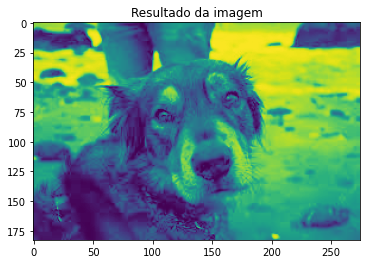

(183, 275)
[[213. 216. 217. ... 111. 111. 111.]
 [207. 209. 211. ...  76.  76.  76.]
 [213. 212. 211. ...  75.  75.  75.]
 ...
 [ 31.  28.  26. ... 104. 104. 103.]
 [ 39.  36.  31. ... 103. 102. 102.]
 [ 44.  39.  36. ... 102. 101. 101.]]


In [86]:



# Função de integração do arco da parábola
def func(x):
    return np.sqrt(1 - x**2)

# Integrar a área do arco da parábola
area, _ = spi.quad(func, -1, 1)

# Normalizar a área para 1
normalized_area = area / area

# Aplicar a integração à imagem em tons de cinza
Resultado = eq2 * normalized_area

# Salvar imagem resultante
plt.imshow(Resultado.astype(np.uint8))
plt.title("Resultado da imagem")
plt.show()
print(eq2.shape)
print(Resultado)

In [87]:
estica_hista = Resultado - Resultado.min()    # esticamento linear
estica_hista = Resultado * 255 / Resultado.max()  # stretch do histograma
estica_hista = estica_hista.astype ('uint8')
print(estica_hista)

[[213 216 217 ... 111 111 111]
 [207 209 211 ...  76  76  76]
 [213 212 211 ...  75  75  75]
 ...
 [ 31  28  26 ... 104 104 103]
 [ 39  36  31 ... 103 102 102]
 [ 44  39  36 ... 102 101 101]]
